In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='/Library/Fonts/Songti.ttc')
%matplotlib inline

In [2]:
data = pd.read_csv('tianchi_mobile_recommend_train_user.csv')
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time
0,98047837,232431562,1,NaN,4245,2014-12-06 02
1,97726136,383583590,1,NaN,5894,2014-12-09 20
2,98607707,64749712,1,NaN,2883,2014-12-18 11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10
4,98145908,290208520,1,NaN,13926,2014-12-16 21


In [3]:
item = pd.read_csv('tianchi_mobile_recommend_train_item.csv')
item.head()

,item_id,item_geohash,item_category
0,312051294,NaN,8270
1,99999754,NaN,7393
2,131746128,NaN,7876
3,385731330,NaN,10544
4,100004415,NaN,3064


## 数据字段解释：
+ user_id：用户身份，
+ item_id：商品ID，
+ behavior_type：用户行为类型（包含点击、收藏、加购物车、支付四种行为，分别用数字1、2、3、4表示）
+ user_geohash：地理位置
+ item_category：品类ID（商品所属的品类）
+ time：用户行为发生的时间

## 电商模式常用分析
+ 用户行为分析：pv uv
+ 用户消费行为分析：消费次数，日ATPPU 日ARPU,付费率
+ 复购情况分析：复购时间间隔消费次数分布
+ 漏斗流失分析
+ 用户行为与商品种类分析
+ 二八理论分析
+ 用户价值RFM分析

In [3]:
# 用户PV、UV分析
# data['days'] = data['time'][0:10]
data['day'] = data['time'].str[0:10]
data['hour'] = data['time'].str[11:]
data.head()

,user_id,item_id,behavior_type,user_geohash,item_category,time,day,hour
0,98047837,232431562,1,NaN,4245,2014-12-06 02,2014-12-06,02
1,97726136,383583590,1,NaN,5894,2014-12-09 20,2014-12-09,20
2,98607707,64749712,1,NaN,2883,2014-12-18 11,2014-12-18,11
3,98662432,320593836,1,96nn52n,6562,2014-12-06 10,2014-12-06,10
4,98145908,290208520,1,NaN,13926,2014-12-16 21,2014-12-16,21


In [4]:
# 按天维度聚合求出pv和uv
pv_day = data.groupby('day')['behavior_type'].value_counts().unstack()
pv_day.columns = ['点击','收藏','加购物车','支付']
# pv_day.reset_index(inplace=True)
uv_day = data.groupby(['day','behavior_type'])['user_id'].nunique().unstack()
uv_day.columns = ['点击','收藏','加购物车','支付']
# uv_day.reset_index(inplace=True)
# uv_day.reset_index(drop=True)

In [15]:
print(uv_day.head())
print(pv_day.head())

              点击    收藏  加购物车    支付
day                               
2014-11-18  6340  1516  2221  1539
2014-11-19  6418  1499  2201  1511
2014-11-20  6332  1502  2210  1492
2014-11-21  6275  1439  2023  1330
2014-11-22  6184  1479  2100  1411
                点击    收藏   加购物车    支付
day                                  
2014-11-18  345855  6904  10212  3730
2014-11-19  337870  7152  10115  3686
2014-11-20  332792  7167  10008  3462
2014-11-21  314572  6832   8679  3021
2014-11-22  340563  7252   9970  3570


In [5]:
# 按小时为维度聚合求出pv和uv
pv_hour = data.groupby('hour')['behavior_type'].value_counts().unstack()
pv_hour.columns = ['点击','收藏','加购物车','支付']
# pv_hour.reset_index(inplace=True)
uv_hour = data.groupby(['hour','behavior_type'])['user_id'].nunique().unstack()
# uv_hour.reset_index(inplace=True)
# uv_hour.reset_index(drop=True)
uv_hour.columns = ['点击','收藏','加购物车','支付']

In [7]:
print(uv_hour.head())
print(pv_hour.head())

        点击    收藏  加购物车    支付
hour                        
00    5750  1726  2464  1601
01    3747   951  1355   685
02    2513   595   846   348
03    1916   409   572   199
04    1751   379   489   174
          点击     收藏   加购物车    支付
hour                            
00    487341  11062  14156  4845
01    252991   6276   6712  1703
02    139139   3311   3834   806
03     93250   2282   2480   504
04     75832   2010   2248   397


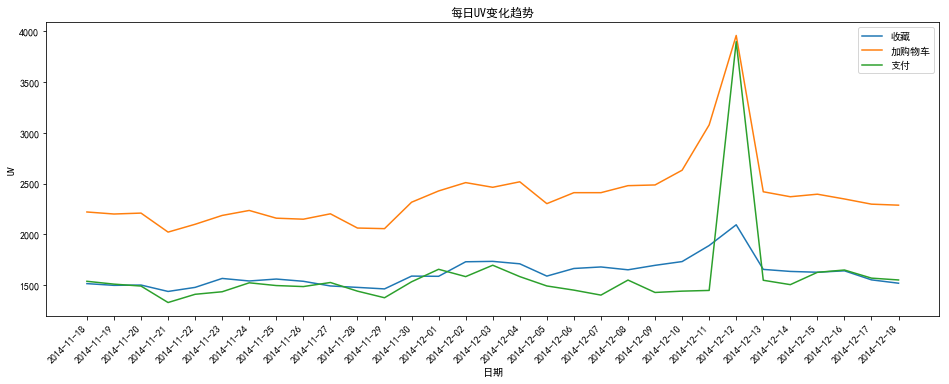

In [32]:
# 绘制天级UV变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加数据
# plt.plot(uv_day.index,uv_day["点击"],label = '点击')
plt.plot(uv_day.index,uv_day["收藏"],label = '收藏')
plt.plot(uv_day.index,uv_day["加购物车"],label = '加购物车')
plt.plot(uv_day.index,uv_day["支付"],label = '支付')
# 添加标题和坐标轴标签
plt.title('每日UV变化趋势')
plt.xlabel('日期')
plt.ylabel('UV')
# 剔除图框上边界和右边界的刻度
plt.tick_params(top = False, right = False)
# 让图例生效
plt.legend()
# x轴倾斜45度
fig.autofmt_xdate(rotation = 45)
plt.show()

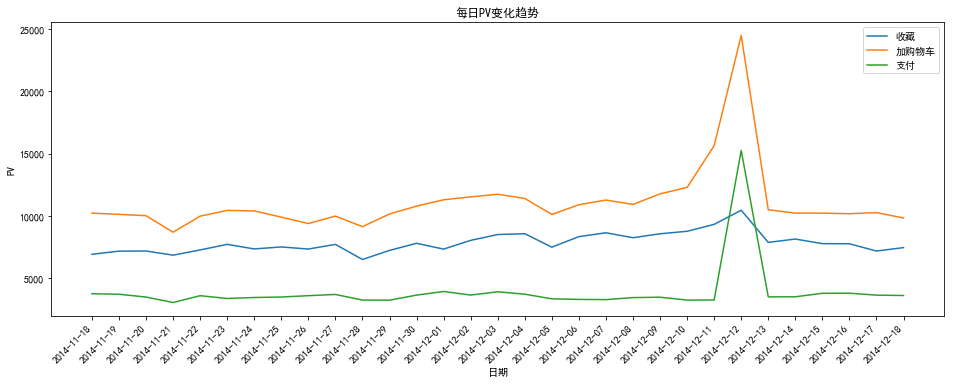

In [31]:
# 绘制天级PV变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加数据
# plt.plot(pv_day.index,pv_day["点击"],label = '点击')
plt.plot(pv_day.index,pv_day["收藏"],label = '收藏')
plt.plot(pv_day.index,pv_day["加购物车"],label = '加购物车')
plt.plot(pv_day.index,pv_day["支付"],label = '支付')
# 添加标题和坐标轴标签
plt.title('每日PV变化趋势')
plt.xlabel('日期')
plt.ylabel('PV')
# 剔除图框上边界和右边界的刻度
plt.tick_params(top = False, right = False)
# 让图例生效
plt.legend()
# x轴倾斜45度
fig.autofmt_xdate(rotation = 45)
plt.show()

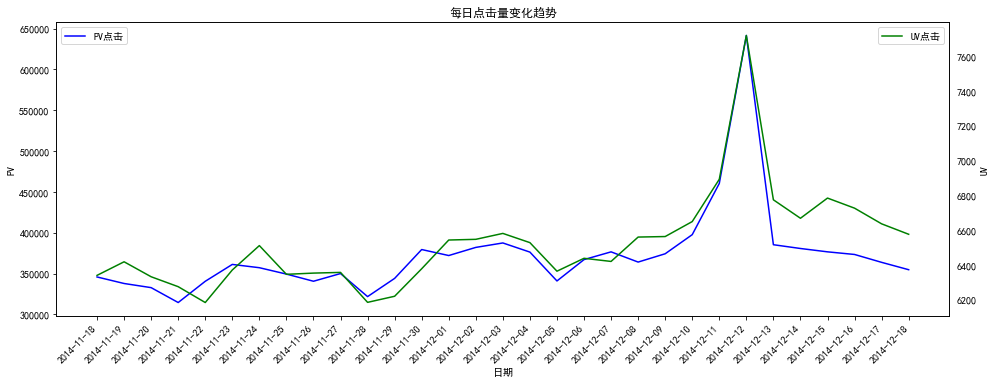

In [30]:
# 天级点击量的PV和UV变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加两个子图
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel('日期')
# 添加数据
ax1.plot(pv_day.index,pv_day["点击"],label = 'PV点击',color='blue')
ax1.set_ylabel('PV')
ax2.plot(uv_day.index,uv_day["点击"],label = 'UV点击',color='green')
ax2.set_ylabel('UV')
# 添加标题和坐标轴标签
ax1.set_title('每日点击量变化趋势')

# 剔除图框上边界和右边界的刻度
ax1.tick_params(top = False, right = False)
ax2.tick_params(top = False, right = False)
# 让图例生效
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
fig.autofmt_xdate(rotation = 45)
plt.show()

### 日行为PV、UV分析
+ 从点击量来看，12月12日的pv和uv有明显的上升，且12月12日的加购和支付行为的pv和uv也有显著上升，说明12月12日的“双12”活动对于用户的购买行为有较大的促进，且因为支付行为整体上升，所以最终的收益也是显著的。
+ 从收藏行为的pv和uv来看，“双12”活动对于用户的收藏行为没有很大的正效应，说明用户对于商品的mark行为，不会因为优惠促销活动而增加，而需要其他的方式来引导用户进行mark（比如带货、其他平台推广等）

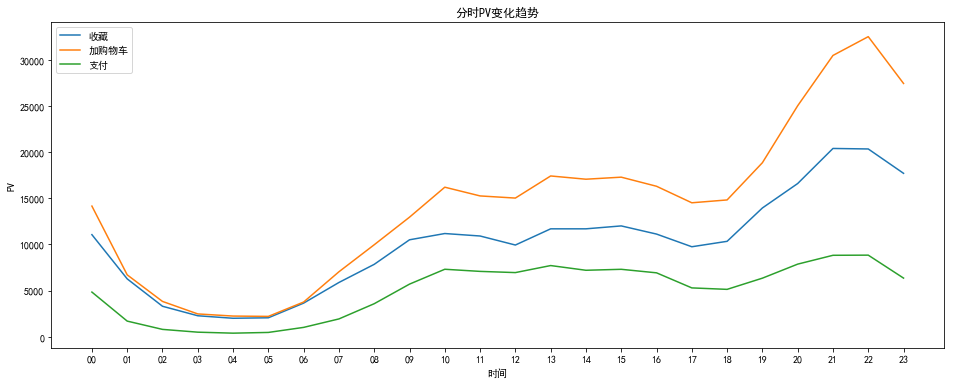

In [38]:
# 绘制分时pv变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加数据
# plt.plot(uv_day.index,uv_day["点击"],label = '点击')
plt.plot(pv_hour.index,pv_hour["收藏"],label = '收藏')
plt.plot(pv_hour.index,pv_hour["加购物车"],label = '加购物车')
plt.plot(pv_hour.index,pv_hour["支付"],label = '支付')
# 添加标题和坐标轴标签
plt.title('分时PV变化趋势')
plt.xlabel('时间')
plt.ylabel('PV')
# 剔除图框上边界和右边界的刻度
plt.tick_params(top = False, right = False)
# 让图例生效
plt.legend()
# x轴倾斜45度
# fig.autofmt_xdate(rotation = 45)
plt.show()

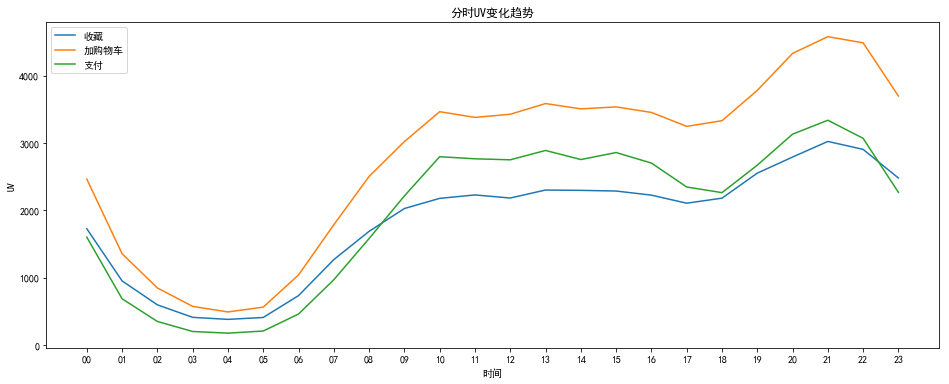

In [44]:
# 绘制分时UV变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加数据
# plt.plot(uv_day.index,uv_day["点击"],label = '点击')
plt.plot(uv_hour.index,uv_hour["收藏"],label = '收藏')
plt.plot(uv_hour.index,uv_hour["加购物车"],label = '加购物车')
plt.plot(uv_hour.index,uv_hour["支付"],label = '支付')
# 添加标题和坐标轴标签
plt.title('分时UV变化趋势')
plt.xlabel('时间')
plt.ylabel('UV')
# 剔除图框上边界和右边界的刻度
plt.tick_params(top = False, right = False)
# 让图例生效
plt.legend()
# x轴倾斜45度
# fig.autofmt_xdate(rotation = 45)
plt.show()

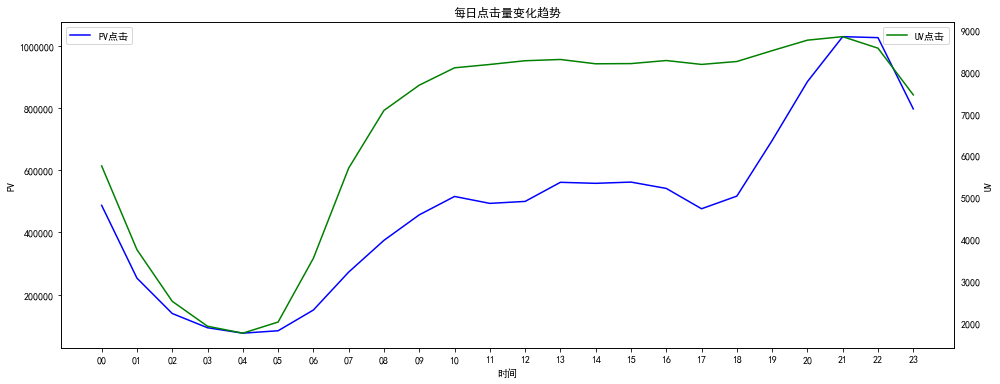

In [46]:
# 分时点击量的PV和UV变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加两个子图
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel('时间')
# 添加数据
ax1.plot(pv_hour.index,pv_hour["点击"],label = 'PV点击',color='blue')
ax1.set_ylabel('PV')
ax2.plot(uv_hour.index,uv_hour["点击"],label = 'UV点击',color='green')
ax2.set_ylabel('UV')
# 添加标题和坐标轴标签
ax1.set_title('每日点击量变化趋势')

# 剔除图框上边界和右边界的刻度
ax1.tick_params(top = False, right = False)
ax2.tick_params(top = False, right = False)
# 让图例生效
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# x轴倾斜45度
# fig.autofmt_xdate(rotation = 45)
plt.show()

### 分时行为PV、UV分析
+ 从点击量来看，从上午10点以后，活跃人数就没有很明显的变化了，说明活跃人数在每天的时间上没有集中性；但点击的PV在晚高峰（19~23点）有很明显的突增，说明用户的活跃时间主要集中在晚上19~23时。
+ 从加购、收藏、支付的PV和UV来看，加购和收藏的PV和点击一样，有很明显的晚高峰行为，但支付的PV在晚高峰没有增长，说明用户的活跃时间是主要集中在晚高峰，但活跃是仅针对于商品的浏览和收藏加购的，对于实际的购买支付行为来说，不会随着用户的活跃时间而变化。所以，在晚高峰时间，可以针对性的做一些引导消费者进行商品浏览的推广活动，促进消费者的商品点击量和收藏加购，进而促进消费者的消费。

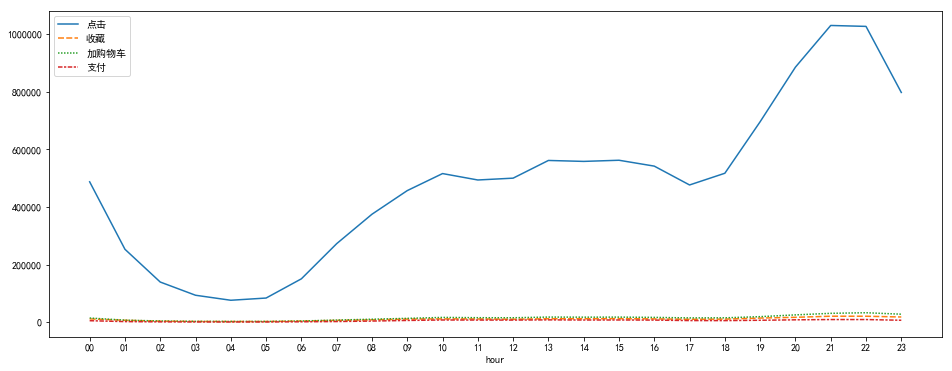

In [33]:
plt.figure(figsize=(16,6))
sns.lineplot(data=pv_hour)

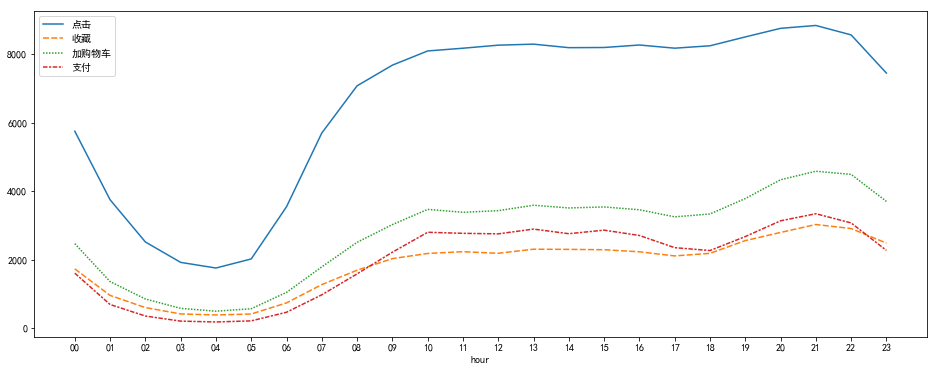

In [34]:
plt.figure(figsize=(16,6))
sns.lineplot(data=uv_hour)

## 日ARPPU
+ ARPPU（average revenue per paying user）是指从每位付费用户身上获得的收入，它反映的是每个付费用户的平均付费额度。
+ ARPPU=总收入/活跃用户付费数量
+ 因为本数据集中没有消费金额，因此在计算过程中用消费次数代替消费金额
+ 人均消费次数=消费总次数/消费人数

In [47]:
# 按天维度聚合求出pv和uv
pv_day = data.groupby('day')['behavior_type'].value_counts().unstack()
pv_day.columns = ['点击_PV','收藏_PV','加购物车_PV','支付_PV']
# pv_day.reset_index(inplace=True)
uv_day = data.groupby(['day','behavior_type'])['user_id'].nunique().unstack()
uv_day.columns = ['点击_UV','收藏_UV','加购物车_UV','支付_UV']
# uv_day.reset_index(inplace=True)
# uv_day.reset_index(drop=True)

In [53]:
# 日支付记录PV和UV表
pay_day = pv_day.join(uv_day)[["支付_PV","支付_UV"]]
pay_day["人均消费次数"] = pay_day["支付_PV"] / pay_day["支付_UV"]
pay_day.head()

,支付_PV,支付_UV,人均消费次数
day,,,
2014-11-18,3730,1539,2.423652
2014-11-19,3686,1511,2.439444
2014-11-20,3462,1492,2.320375
2014-11-21,3021,1330,2.271429
2014-11-22,3570,1411,2.530120


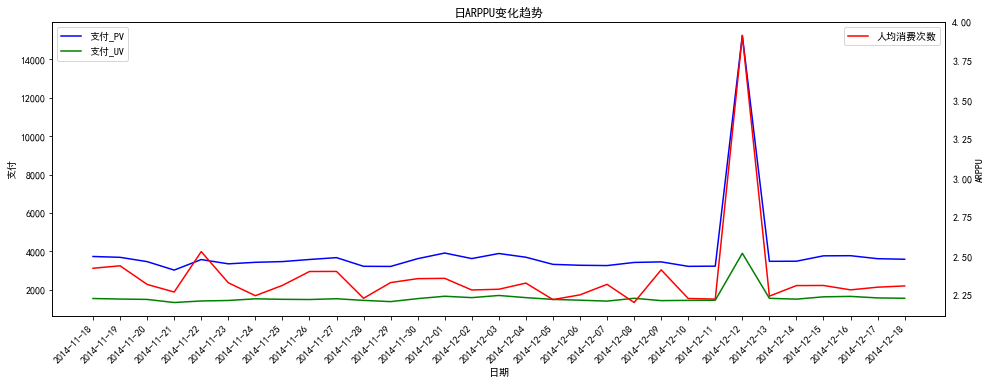

In [55]:
# 日ARPPU变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加两个子图
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel('日期')
# 添加数据
ax1.plot(pay_day.index,pay_day["支付_PV"],label = '支付_PV',color='blue')
ax1.plot(pay_day.index,pay_day["支付_UV"],label = '支付_UV',color='green')
ax1.set_ylabel('支付')
ax2.plot(pay_day.index,pay_day["人均消费次数"],label = '人均消费次数',color='red')
ax2.set_ylabel('ARPPU')
# 添加标题和坐标轴标签
ax1.set_title('日ARPPU变化趋势')

# 剔除图框上边界和右边界的刻度
ax1.tick_params(top = False, right = False)
ax2.tick_params(top = False, right = False)
# 让图例生效
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# x轴倾斜45度
fig.autofmt_xdate(rotation = 45)
plt.show()

### 日ARPPU分析
+ 从图中可以看出，人均消费次数整体在天级上没有很大的变化，均在2.25~2.5之间波动，但“双12”活动的当天，人均消费次数有较大的途次，表明该销售活动刺激了单个用户的购买欲望。

### 日ARPU
+ ARPU(Average Revenue Per User) ：平均每用户收入，可通过 总收入/AU 计算得出。它可以衡量产品的盈利能力和发展活力。
+ 活跃用户数平均消费次数=消费总次数/活跃用户人数(每天有操作行为的为活跃)

In [6]:
# 活跃用户人数
uv_view_day = data.groupby('day')['user_id'].nunique().to_frame()
uv_view_day.columns = ['活跃用户']
ARPU_day = uv_view_day.join(pv_day)[["支付","活跃用户"]]
ARPU_day['日ARPU'] = ARPU_day['支付'] / ARPU_day['活跃用户']
ARPU_day

,支付,活跃用户,日ARPU
day,,,
2014-11-18,3730,6343,0.588050
2014-11-19,3686,6420,0.574143
2014-11-20,3462,6333,0.546660
2014-11-21,3021,6276,0.481358
2014-11-22,3570,6187,0.577016
2014-11-23,3347,6373,0.525184
2014-11-24,3426,6513,0.526025
2014-11-25,3464,6351,0.545426
2014-11-26,3573,6357,0.562058


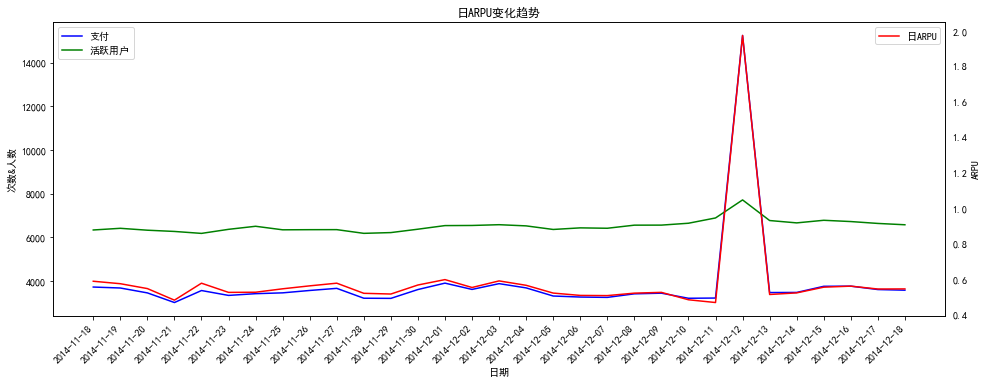

In [7]:
# 日ARPU变化趋势
# 设置图框的大小
fig = plt.figure(figsize=(16,6))
# 添加两个子图
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax1.set_xlabel('日期')
# 添加数据
ax1.plot(ARPU_day.index,ARPU_day["支付"],label = '支付',color='blue')
ax1.plot(ARPU_day.index,ARPU_day["活跃用户"],label = '活跃用户',color='green')
ax1.set_ylabel('次数&人数')
ax2.plot(ARPU_day.index,ARPU_day["日ARPU"],label = '日ARPU',color='red')
ax2.set_ylabel('ARPU')
# 添加标题和坐标轴标签
ax1.set_title('日ARPU变化趋势')

# 剔除图框上边界和右边界的刻度
ax1.tick_params(top = False, right = False)
ax2.tick_params(top = False, right = False)
# 让图例生效
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
# x轴倾斜45度
fig.autofmt_xdate(rotation = 45)

plt.show()

### 日ARPU分析
+ 从日ARPU来看，日ARPU没有很大的波动性，基本上在0.4~0.6之间，但在“双12”活动期间，日ARPU明细上升，说明该活动对于提升用户的付费转化率有很明显的效果

### 分商品ARPU分析

In [14]:
# 分商品分类用户UV
uv_view_item = data.groupby('item_category')['user_id'].nunique().to_frame()
uv_view_item.columns = ['活跃用户']
# 分商品分类用户行为UV
uv_item = data.groupby(['item_category','behavior_type'])['user_id'].nunique().unstack()
uv_item.columns = ['点击_UV','收藏_UV','加购物车_UV','支付_UV']
# 合并两个表
ARPU_item = uv_view_item.join(uv_item)[["支付_UV","活跃用户"]]
# 填充支付的空值为0
ARPU_item['支付_UV'].fillna(0, inplace=True)
ARPU_item['商品分类ARPU'] = ARPU_item['支付_UV'] / ARPU_item['活跃用户']
ARPU_item


,支付_UV,活跃用户,商品分类ARPU
item_category,,,
2,0.0,1,0.000000
3,0.0,1,0.000000
4,0.0,1,0.000000
6,0.0,8,0.000000
8,4.0,51,0.078431
...,...,...,...
14075,1.0,7,0.142857
14076,0.0,7,0.000000
14078,0.0,3,0.000000


In [24]:
# 取出商品分类ARPU前100的分类
ARPU_item_top100 = ARPU_item.sort_values(by = ['商品分类ARPU'],axis = 0,ascending = False).loc[(ARPU_item["活跃用户"]>100)].head(100)
# 取出商品分类ARPU为0的分类
ARPU_item_0 = ARPU_item.loc[(ARPU_item["活跃用户"]>100) & (ARPU_item["商品分类ARPU"]==0)]


In [25]:
ARPU_item_top100

,支付_UV,活跃用户,商品分类ARPU
item_category,,,
2949,309.0,810,0.381481
4329,67.0,186,0.360215
13932,41.0,118,0.347458
13393,44.0,141,0.312057
4583,42.0,143,0.293706
...,...,...,...
5919,44.0,236,0.186441
738,21.0,113,0.185841
5065,54.0,291,0.185567


In [26]:
ARPU_item_0.shape[0]

32